In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 5.59216014, -8.91394025],
       [ 6.56463297,  5.79843748],
       [ 6.76826994,  7.4797113 ],
       ...,
       [-4.61927649, -5.19558271],
       [-5.87404601, -4.08248017],
       [-5.68469664, -5.09769056]], shape=(1000, 2))

In [4]:
y

array([2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2,
       2, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0,
       1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0,
       2, 1, 1, 0, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1,
       0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2,
       0, 2, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1,
       2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 1,
       0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 2, 2, 0,

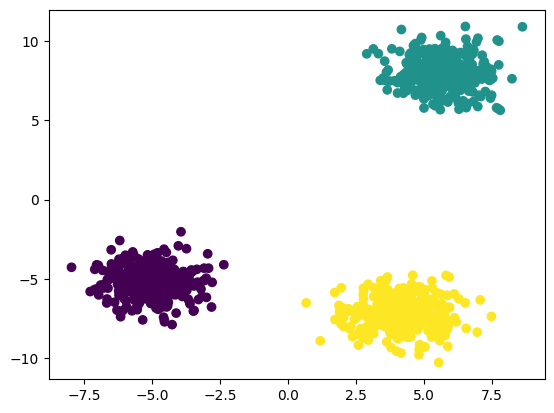

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [11]:
## Elbow method to select K Value

from sklearn.cluster import KMeans

wcss=[]

for idx in range(1,11):
    kmeans=KMeans(n_clusters=idx,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
    

In [12]:
wcss

[1340.0000000000005,
 446.3779283129512,
 42.317174208413135,
 36.22695335334153,
 30.022627346227367,
 24.46791860038117,
 22.258547687216318,
 20.54585644061691,
 18.92167741354996,
 17.583999157160132]

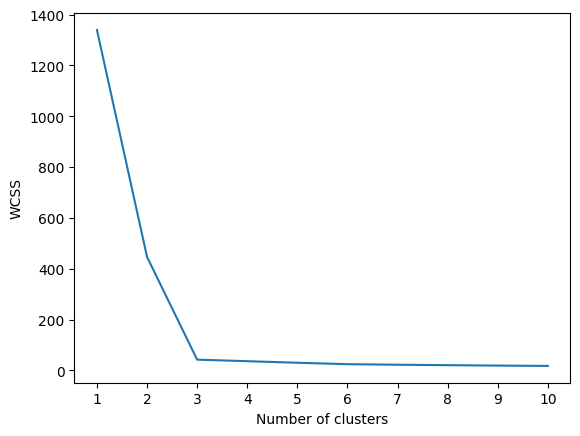

In [13]:
## Elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3, init='k-means++')
kmeans.fit_predict(X_train_scaled)

array([2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1,
       1, 1, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 1,
       0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0,
       0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 0,
       2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0,
       1, 1, 1, 0, 1, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2,
       1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1,
       2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 1,
       1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2,

In [15]:
y_pred=kmeans.predict(X_test_scaled)

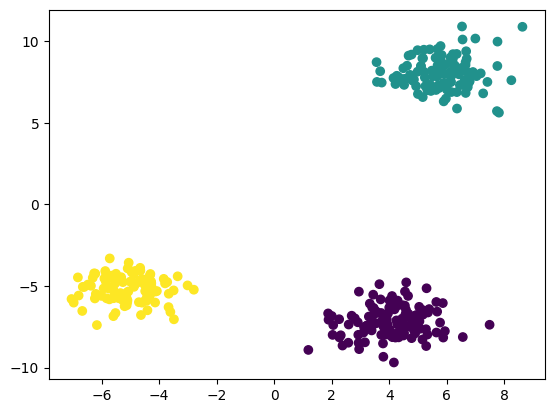

In [17]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [19]:
!pip install kneed

In [22]:
## Validating K value can be achieved by 2 other techniques
## Knee Locator
## Silhoutee scoring

## Knee Locator
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [23]:
kl.elbow

np.int64(3)

In [24]:
## Silhoutee scoring
from sklearn.metrics import silhouette_score

In [26]:
silhouette_coefficients=[]
for idx in range(2,11):
    kmeans=KMeans(n_clusters=idx,init='k-means++')
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [27]:
silhouette_coefficients

[np.float64(0.6697502867834177),
 np.float64(0.8425011400988796),
 np.float64(0.6777909758655842),
 np.float64(0.5366141100837105),
 np.float64(0.3638940465024836),
 np.float64(0.343902897439193),
 np.float64(0.3433402506061281),
 np.float64(0.3082733965272107),
 np.float64(0.32597931549244036)]

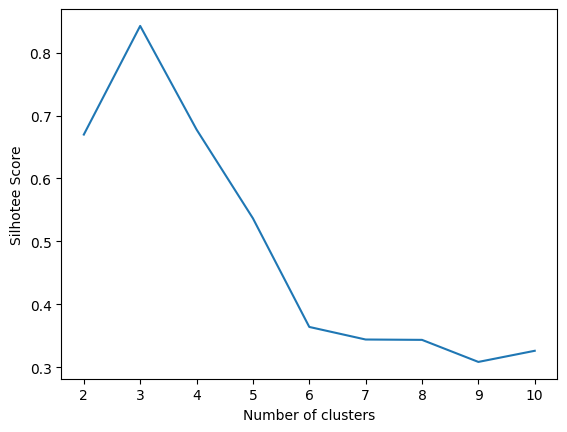

In [28]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhotee Score")
plt.show()